##  Įvaizdžių išskaidymo pavyzdys

<a href="https://colab.research.google.com/github/uqglmn/groups/blob/main/Pavyzdys_S3_įvaizdžių_išskaidymas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Šiame pavyzdyje išskaidysime grupės $S_3$ natūralaus įvaizdžio tenzorinį kvadratą.

In [1]:
# Bibliotekos
import sympy as sym
import numpy as np
from sympy.physics.quantum import TensorProduct

# Renderinimo nustatymas
sym.init_printing(use_unicode=True)

In [2]:
# Grupės S3 eilė
ng = 6

### Kai kurie $S_3$ įvaizdžiai

#### Neredukuojami įvaizdžiai

In [3]:
# Trivialus įvaizdis ir jo charakteris
rep_triv  = [1, 1, 1, 1, 1, 1]
char_triv =  np.array(rep_triv)

In [4]:
# Alternuojantis įvaizdis ir jo charakteris
rep_alt  = [1, -1, -1, -1, 1, 1]
char_alt = np.array(rep_alt)

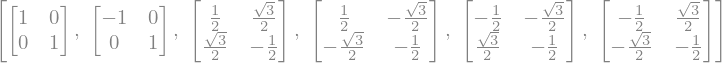

In [5]:
# Standartinis įvaizdis
rep_st  = [sym.Matrix([[1, 0],[0, 1]]), sym.Matrix([[-1, 0],[ 0, 1]]), 
           sym.Rational(1,2)*sym.Matrix([[1, sym.sqrt(3)], [sym.sqrt(3), -1]]), 
           sym.Rational(1,2)*sym.Matrix([[1, -sym.sqrt(3)], [-sym.sqrt(3), -1]]), 
           sym.Rational(1,2)*sym.Matrix([[-1, -sym.sqrt(3)],[sym.sqrt(3), -1]]), 
           sym.Rational(1,2)*sym.Matrix([[-1, sym.sqrt(3)],[-sym.sqrt(3), -1]])]
char_st = np.array([2,0,0,0,-1,-1])

rep_st

#### Natūralus įvaizdis ir jo tenzorinis kvadratas

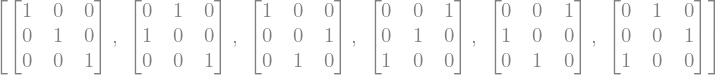

In [6]:
# S_3 natūralus perstatymo įvaizdis
E = sym.Matrix([[1,0,0],[0,1,0],[0,0,1]])

P12 = sym.Matrix([[0,1,0],[1,0,0],[0,0,1]])
P23 = sym.Matrix([[1,0,0],[0,0,1],[0,1,0]])
P13 = sym.Matrix([[0,0,1],[0,1,0],[1,0,0]])

P123 = P12*P23
P321 = P23*P12

rep_nat = [E, P12, P23, P13, P123, P321]

char_nat = np.array([3,1,1,1,0,0])

rep_nat

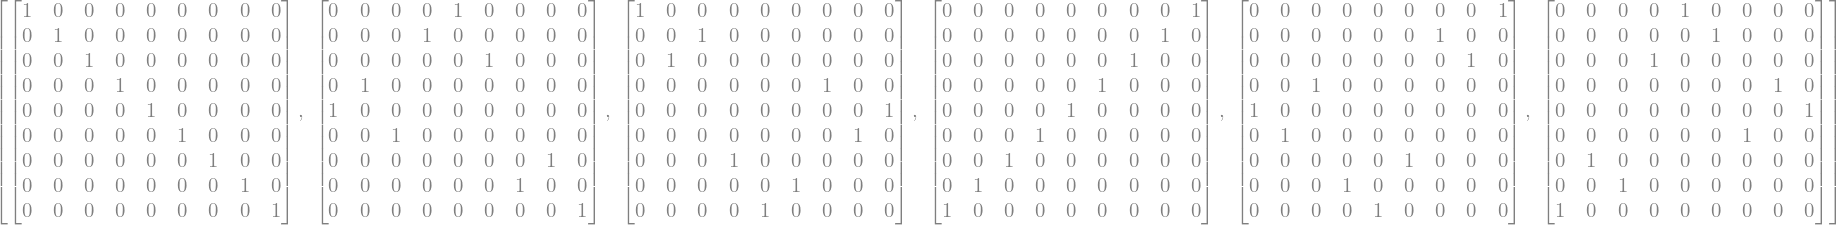

In [7]:
# S_3 natūralaus įvaizdžio tenzorinis kvadratas. Įvaizdžio erdvę vadinsime V
rep_nn = []
for i in range(6):
    rep_nn.append(TensorProduct(rep_nat[i], rep_nat[i]))
    
char_nn = char_nat**2
    
rep_nn

### Įvaizdžio išskaidymas

#### Charakterių skaliarinės sandaugos

Charakterių skaliarinė sandauga parodo, kiek kartų kiekvienas neredukuojamas įvaizdis pasirodo mūsų nagrinėjamame įvaizdyje:

$
m_i = (\chi_V | \chi_i ) = \frac{1}{n_G}\sum_{g \in G} \chi_V(g) \overline{\chi_i(g)}
$

In [8]:
# neredukuojamų įvaizdžių charakteriai
char_irreps = [char_triv, char_alt, char_st]

In [9]:
# patikriname neredukuojamų įvaizdžių charakterių ortogonalumo sąryšius
table = np.zeros([3,3], dtype=int)
for i in range(3):
    for j in range(3):
        table[i,j] = (char_irreps[i] * char_irreps[j]).sum()/ng
        
table

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [10]:
# Natūralaus įvaizdžio tenzorinio kvadrato išskaidymas
m = []
for i in range(3):
    m.append(int((char_nn * char_irreps[i]).sum()/ng))
    
# m = [m_triv, m_alt, m_st, m_std, m_2d]
m

Tai reiškia, kad $V_{nat} \otimes V_{nat} = V_{triv}^{\oplus 2} \oplus V_{alt} \oplus V_{st}^{\oplus 3}$

#### Projekciniai operatoriai

Sukonstruosime projekcinius operatorius $p_i : V \to W_i$, kur

$
p_i = \dfrac{n_i}{n_G} \sum_{g \in G} \overline{\chi_i(g)} \rho_V(g)
$

triviliam, alternuojančiam, ir standartiniam įvaizdžiui.

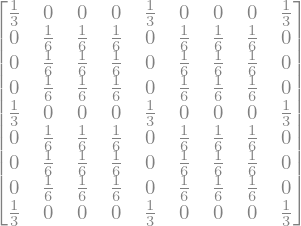

In [11]:
# Projektorius į V -> W_triv 
p_triv = sym.zeros(9)
for i in range(6):
    p_triv += rep_nn[i]
p_triv = sym.Rational(1,6)*p_triv
p_triv

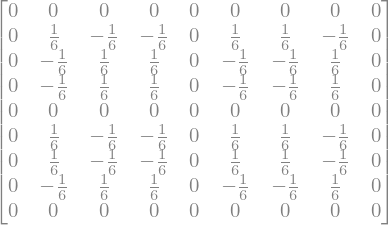

In [12]:
# Projektorius į V -> W_alt
p_alt = sym.zeros(9)
for i in range(6):
    p_alt += char_alt[i]*rep_nn[i]
p_alt = sym.Rational(1,6)*p_alt
p_alt

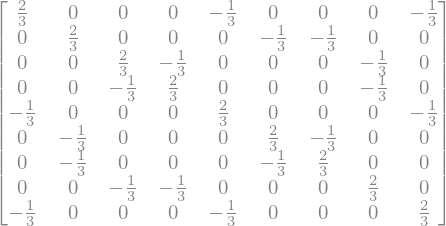

In [13]:
# Projektorius į V -> W_st
p_st = sym.zeros(9)
for i in range(6):
    p_st += char_st[i]*rep_nn[i]
p_st = sym.Rational(2,6)*p_st
p_st

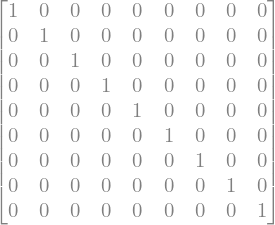

In [14]:
# Patikrinimas - projektorių suma turi duoti vienetinę matricą
p_triv + p_alt + p_st

#### Įvaizdžio išskaidymas

Tegul $p$ būna projekcinis operatorius. Tada ${\rm image}\, p = E(1,p)$ ir ${\rm kernel}\, p = E(0,p)$, kur $E(\lambda,p)$ yra operatoriaus $p$ tikrinės erdvės.

Tai reiškia, kad mums užtenka:

- Surasti kiekvieno projektoriaus tiesiškai nepriklausomus tikrinius vektorius atitinkančius tikrinę vertę $\lambda = 1$.

- Gautus vektorius ortonormuoti pasinaudojant Gram–Schmidt metodu.

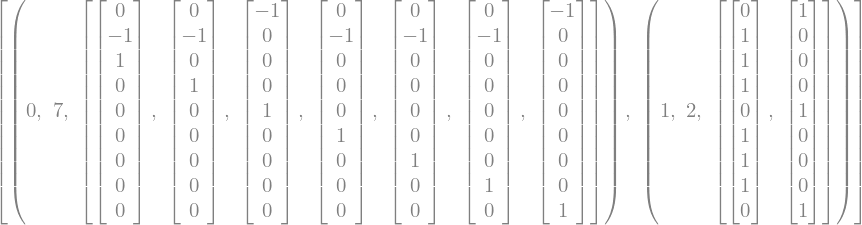

In [15]:
# p_triv branduolys yra 7-matis, o vaizdas yra 2-matis
eig = p_triv.eigenvects()
eig

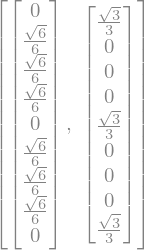

In [16]:
# paimame tikrinius vektorius atitinkancius tikrinę vertę 1
W_triv = sym.GramSchmidt(eig[1][2], orthonormal=True)
W_triv

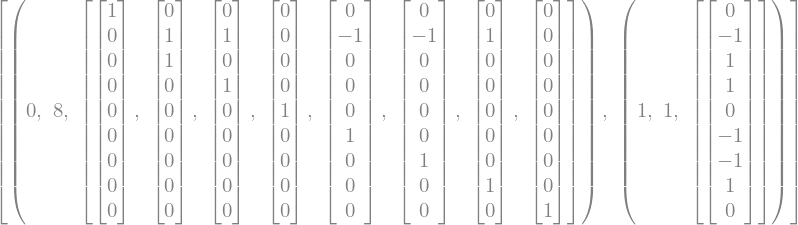

In [17]:
# p_alt branduolys yra 8-matis, o vaizdas yra 1-matis
eig = p_alt.eigenvects()
eig

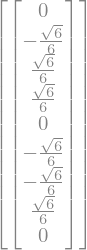

In [18]:
# paimame tikrinius vektorius atitinkancius tikrinę vertę 1
W_alt = sym.GramSchmidt(eig[1][2], orthonormal=True)
W_alt

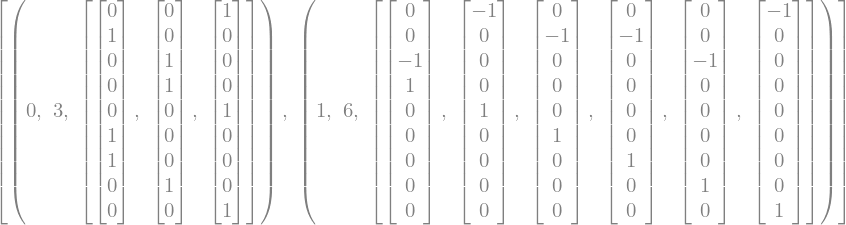

In [19]:
# p_st branduolys yra 3-matis, o vaizdas yra 6-matis
eig = p_st.eigenvects()
eig

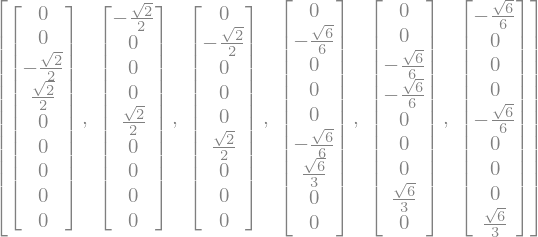

In [20]:
# paimame tikrinius vektorius atitinkancius tikrinę vertę 1
W_st = sym.GramSchmidt(eig[1][2], orthonormal=True)
W_st

#### $W_{\sf st}$ išskaidymas

Naudosime išskaidymo operatorius:

$
p^{(i)}_{ab}= \dfrac{n_i}{n_G} \sum_{g\in G} r^{(i)}_{ba}(g^{-1})\,\rho_V(g) 
$

In [21]:
# Išskaidymo operatoriai
def p_st_ab(a,b):
    p = sym.zeros(9)
    for i in range(6):
        p += rep_st[i].inv()[b-1,a-1]*rep_nn[i]
    return sym.Rational(2,6)*p

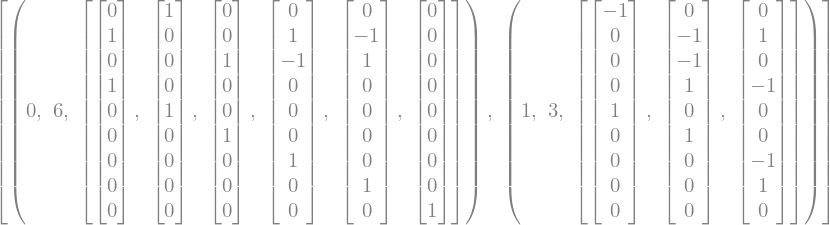

In [22]:
eig = p_st_ab(1,1).eigenvects()
eig

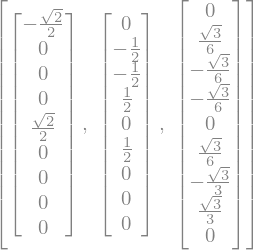

In [23]:
# visi "pirmi" W_st vektoriai
W_st_1 = sym.GramSchmidt(eig[1][2], orthonormal=True)
W_st_1

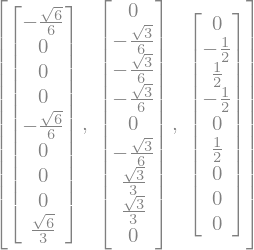

In [24]:
# surandame "visus antrus" W_st vektorius
W_st_2 = []
for v in W_st_1:
    W_st_2.append(p_st_ab(2,1)*v)
W_st_2

#### Įvaizdžio blok-diagonalizavimas

In [25]:
# Sudedame "pirmus" ir "antrus" W_st vektorius į bendrą sąrašą:
W_st_new = []
for i in range(len(W_st_1)):
    W_st_new.append(W_st_1[i])
    W_st_new.append(W_st_2[i])

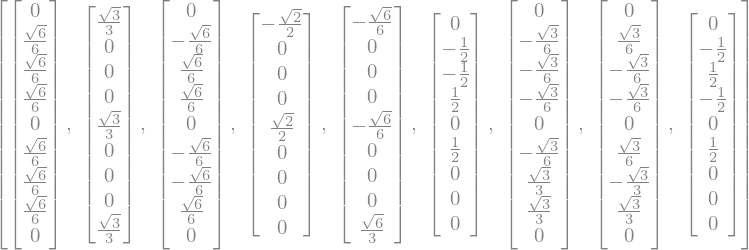

In [26]:
# Nauja bazė
new_basis = W_triv + W_alt + W_st_new
new_basis

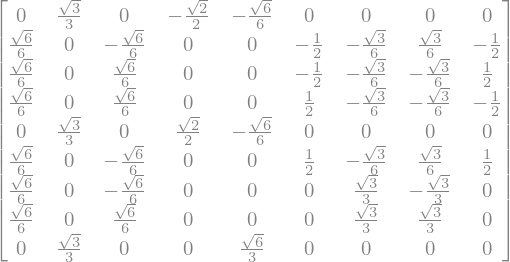

In [27]:
# Naują bazę paverčiame matrica
C = sym.Matrix(np.array(new_basis).reshape(9,9)).T
C

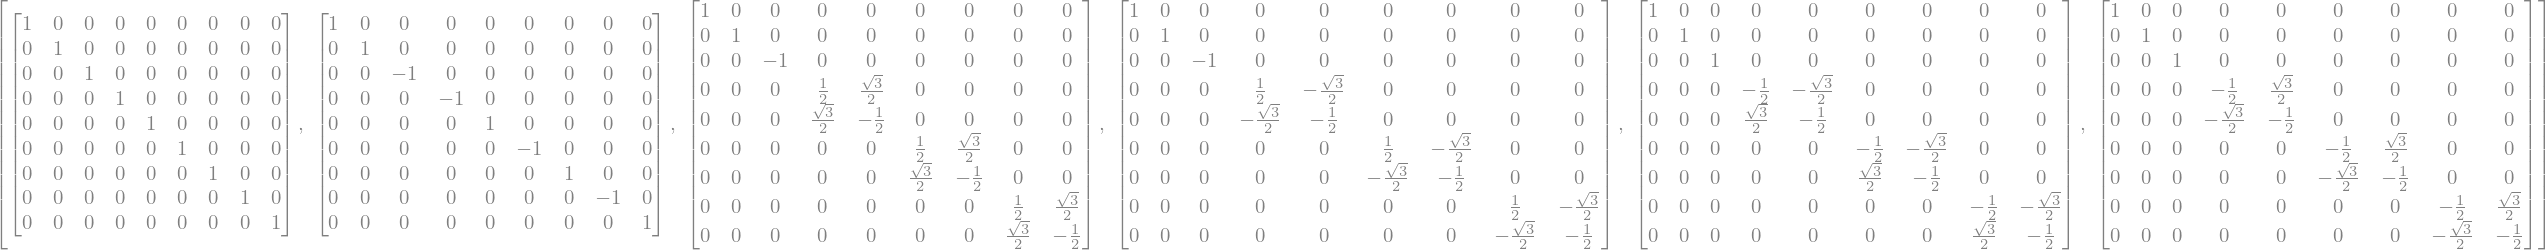

In [28]:
# Blok-diagonalizavimas
rep_nn_bd = []
for i in range(6):
    rep_nn_bd.append(C.inv()*rep_nn[i]*C)
rep_nn_bd